Milestone 2
1. Perkenalan 
    - Nama : Lusitania Ragil Cahyaningsih
    - Batch : CODA-RMT-001
    - Program ini dibuat untuk membantu merekomendasikan standar gaji Data Scientist, Engineering, dan Analyst yang berguna bagi perusahaan dalam mempersiapkan persaingan pasar tenaga kerja pada bidang tersebut.   
    - data source: https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023/data
    - tableau link: 

2. Identifikasi Masalah

    - 2.1 Topik Permasalahan
        - Posisi Data scientist dalam suatu perusahaan/organisasi bisa dibilang cukup penting, terutama untuk perusahaan teknologi seperti startup yang berkembang pesat, seringkali membutuhkan informasi tentang gaji pasaran untuk memastikan mereka memberikan paket gaji yang menarik kepada calon data scientist dan untuk merencanakan anggaran SDM mereka.

    - A.2 Problem Statement (SMART framework)
        - Spesific : standarisasi gaji karyawan Data Scientist dan mempersiapkan perusahaan dalam persaingan pasar tenaga kerja 
        - Measureable : tidak ada karyawan Data Scientist yang resign karena permasalahan gaji 
        - Achievable : analisis dan mengaplikasikan standar gaji karyawan Data Scientist
        - Relevant : melakukan standarisasi gaji karyawan Data Scientist maka perusahaan mampu mempertahankan maupun mendapatkan SDM terbaik 
        - Time Bound : target pelaksanaan awal tahun 2025    
        Sasarannya adalah untuk standarisasi gaji karyawan, dalam hal ini Data Scientist dan mempersiapkan perusahaan dalam persaingan pasar tenaga kerja pada awal tahun 2025 dengan cara menganalisa data-data gaji karyawan pada berbagai perusahaan diberbagai tingkat keahlian dan pengalaman serta menerapkannya.  

    - A.3 Latar Belakang
            
        Di era digital dan teknologi saat ini, profesi Data Scientist semakin berkembang pesat dan menjadi salah satu pekerjaan yang paling dicari di berbagai industri. Data scientist bertugas untuk mengolah, menganalisis, dan menginterpretasi data besar untuk menghasilkan wawasan yang dapat membantu pengambilan keputusan strategis dalam suatu organisasi. Dengan semakin pentingnya peran ini, penting juga untuk memahami berbagai faktor yang mempengaruhi gaji seorang data scientist. Menganalisis data gaji seorang data scientist bukan hanya penting bagi individu yang bekerja di bidang ini, tetapi juga bagi perusahaan dan lembaga yang ingin menarik dan mempertahankan talenta terbaiknya.

    - A.4 Penjabaran Masalah dengan Metode 5W+1H
        - A.2.1 Berapa rata-rata gaji Data Scientist, Data Engineer, dan Data Analyst?
        - A.2.2 Bagaimana tren gaji Data Scientist, Data Engineer, dan Data Analyst dari tahun 2020 - 2023?
        - A.2.3 Berapa rekomendasi gaji Data Scientist, Data Engineer, dan Data Analyst tahun 2025?
        - A.2.4 Berapa rata-rata gaji Data Scientist, Data Engineer, dan Data Analyst tiap experience dan expertise level?
        - A.2.5 Di negara mana gaji tertinggi Data Scientist, Data Engineer, dan Data Analyst?
        - A.2.6 Apa yang mempengaruhi tinggi - rendahnya gaji Data Scientist, Data Engineer, dan Data Analyst?

3. Data Loading
    - source: https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023/data

In [297]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [298]:
# Read the dataset from CSV
df = pd.read_csv('Latest_Data_Science_Salaries.csv')

# Display the first few rows
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


4. Data Cleaning

    Pada tahapan ini, dilakukan cleaning data berupa memeriksa ada atau tidak adanya missing value, mengambil data Top 3 Job Title dan menghapus kolom yang tidak digunakan. 

In [299]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [300]:
df.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [301]:
df['Job Title'].value_counts()

Job Title
Data Engineer                 702
Data Scientist                635
Data Analyst                  459
Machine Learning Engineer     300
Analytics Engineer            132
                             ... 
Manager Data Management         1
Data Management Specialist      1
Principal Data Architect        1
Cloud Data Architect            1
Head of Machine Learning        1
Name: count, Length: 111, dtype: int64

In [302]:
# filter data (hanya digunakan data dengan jumlah job title 3 terbanyak - Data Scientist, Data Engineer, dan Data Analyst)

job_title = ['Data Engineer', 'Data Scientist', 'Data Analyst']

df2 = df.loc[df['Job Title'].isin(job_title)]
df2

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3288,Data Engineer,Full-Time,Mid,Intermediate,130800,United States Dollar,United States,130800,Spain,Medium,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [303]:
# drop kolom tidak digunakan (Salary, Salary Currency)
df3 = df2.drop(columns=['Salary','Salary Currency'])
df3

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3288,Data Engineer,Full-Time,Mid,Intermediate,United States,130800,Spain,Medium,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,United States,412000,United States,Large,2020


In [304]:
# filter data dengan Job Title Data Scientist
df3_scientist = df3[df3['Job Title']=='Data Scientist']
df3_scientist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 4 to 3297
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           635 non-null    object
 1   Employment Type     635 non-null    object
 2   Experience Level    635 non-null    object
 3   Expertise Level     635 non-null    object
 4   Company Location    635 non-null    object
 5   Salary in USD       635 non-null    int64 
 6   Employee Residence  635 non-null    object
 7   Company Size        635 non-null    object
 8   Year                635 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 49.6+ KB


In [305]:
# filter data dengan Job Title Data Scientist
df3_engineer = df3[df3['Job Title']=='Data Engineer']
df3_engineer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 3293
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           702 non-null    object
 1   Employment Type     702 non-null    object
 2   Experience Level    702 non-null    object
 3   Expertise Level     702 non-null    object
 4   Company Location    702 non-null    object
 5   Salary in USD       702 non-null    int64 
 6   Employee Residence  702 non-null    object
 7   Company Size        702 non-null    object
 8   Year                702 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 54.8+ KB


In [306]:
# filter data dengan Job Title Data Scientist
df3_analyst = df3[df3['Job Title']=='Data Analyst']
df3_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 22 to 3282
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           459 non-null    object
 1   Employment Type     459 non-null    object
 2   Experience Level    459 non-null    object
 3   Expertise Level     459 non-null    object
 4   Company Location    459 non-null    object
 5   Salary in USD       459 non-null    int64 
 6   Employee Residence  459 non-null    object
 7   Company Size        459 non-null    object
 8   Year                459 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 35.9+ KB


5. Analisis dan Perhitungan
    - 5.1 Mengetahui kondisi data dengan Analisa Statistik Deskriptif
    
        Statistik deskriptif adalah cabang statistik yang berfokus pada merangkum dan mendeskripsikan ciri-ciri utama suatu dataset. Ini melibatkan penggunaan berbagai ukuran dan teknik statistik untuk memberikan ringkasan data yang ringkas dan bermakna. Statistik deskriptif bertujuan untuk memberikan informasi tentang kecenderungan sentral (central tendency), variabilitas (variability), dan sebaran data (distribution).


In [307]:
# Central Tendency
#rata-rata salary
mean = df3['Salary in USD'].mean()
print(f"Rata-rata gaji Data Scientist, Data Engineer, Data Analyst: $ {mean:.2f}")
# nilai tengah salary
median = df3['Salary in USD'].median()
print(f"Nilai tengah gaji Data Scientist, Data Engineer, Data Analyst: $ {median:.2f}")
# modus salary
mode = df3['Salary in USD'].mode().values[0]
print(f"Nilai gaji Data Scientist, Data Engineer, Data Analyst yang paling sering muncul: $ {mode:.2f}")

Rata-rata gaji Data Scientist, Data Engineer, Data Analyst: $ 133667.13
Nilai tengah gaji Data Scientist, Data Engineer, Data Analyst: $ 127037.50
Nilai gaji Data Scientist, Data Engineer, Data Analyst yang paling sering muncul: $ 100000.00


In [308]:
# job title yang sering muncul
print(df3['Job Title'].mode())


0    Data Engineer
Name: Job Title, dtype: object


In [309]:
# jumlah data per job title
df3['Job Title'].value_counts()

Job Title
Data Engineer     702
Data Scientist    635
Data Analyst      459
Name: count, dtype: int64

In [310]:
# Variability
# range
range = df3['Salary in USD'].max() - df3['Salary in USD'].min()
print(f'Rentang gaji Data Scientist, Data Engineer, Data Analyst: $ {range:.2f}')

Rentang gaji Data Scientist, Data Engineer, Data Analyst: $ 415967.00


In [311]:
# quartile
q1 = df3['Salary in USD'].quantile(0.25)
q2 = df3['Salary in USD'].quantile(0.5)
q3 = df3['Salary in USD'].quantile(0.75)

iqr = q3 - q1

print(f'Q1: $ {q1:.2f}')
print(f'Q2: $ {q2:.2f}')
print(f'Q3: $ {q3:.2f}')
print(f'Interquartile Range (IQR): $ {iqr:.2f}')

Q1: $ 85000.00
Q2: $ 127037.50
Q3: $ 174575.00
Interquartile Range (IQR): $ 89575.00


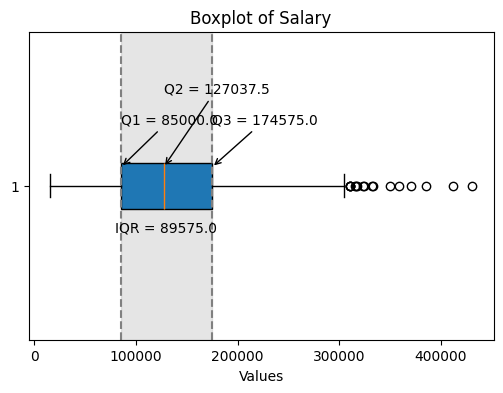

In [312]:
# quartile boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df3['Salary in USD'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Salary')

plt.show()

In [313]:
# variance
variance = df3['Salary in USD'].var()
print('Variasi data gaji Data Scientist, Data Engineer, Data Analyst:', variance)

Variasi data gaji Data Scientist, Data Engineer, Data Analyst: 4011776939.222424


In [314]:
# standard deviation
std = df3['Salary in USD'].std()
print('Standard deviasi data gaji Data Scientist, Data Engineer, Data Analyst:',std)

print(f'\nDari hasil varians diketahui bahwa dari sekelompok orang yang berprofesi sebagai \nData Scientist, Data Engineer dan Data Analyst, memiliki nilai gaji yang sangat beragam \ndan berdasarkan simpangan baku diketahui bahwa variasinya sendiri cukup menyebar \nkarena rata-rata gaji adalah $ {mean:.2f}.')


Standard deviasi data gaji Data Scientist, Data Engineer, Data Analyst: 63338.58965293136

Dari hasil varians diketahui bahwa dari sekelompok orang yang berprofesi sebagai 
Data Scientist, Data Engineer dan Data Analyst, memiliki nilai gaji yang sangat beragam 
dan berdasarkan simpangan baku diketahui bahwa variasinya sendiri cukup menyebar 
karena rata-rata gaji adalah $ 133667.13.


<Axes: ylabel='Frequency'>

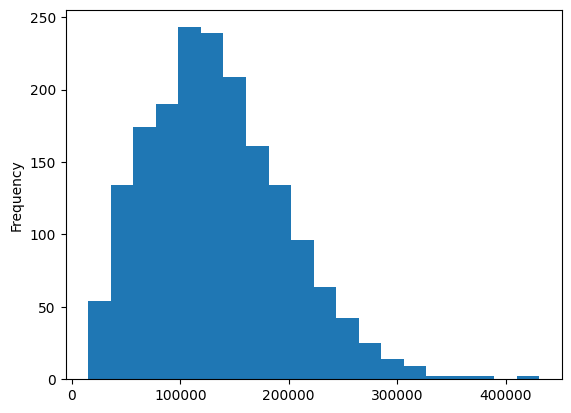

In [315]:
# continuous distribution
df3['Salary in USD'].plot(kind='hist',bins=20)

In [316]:
# Normaly Test - Skewness
print(f"Skewness: {df3['Salary in USD'].skew()}")
print('Distribution is moderately skewed (positive skewed)')

Skewness: 0.6266426799645055
Distribution is moderately skewed (positive skewed)


In [317]:
# Normaly Test - Kurtosis
print(f"Kurtosis: {df3['Salary in USD'].kurtosis()}")
print('Leptokurtic distribution')

Kurtosis: 0.43803536965587275
Leptokurtic distribution


<Axes: >

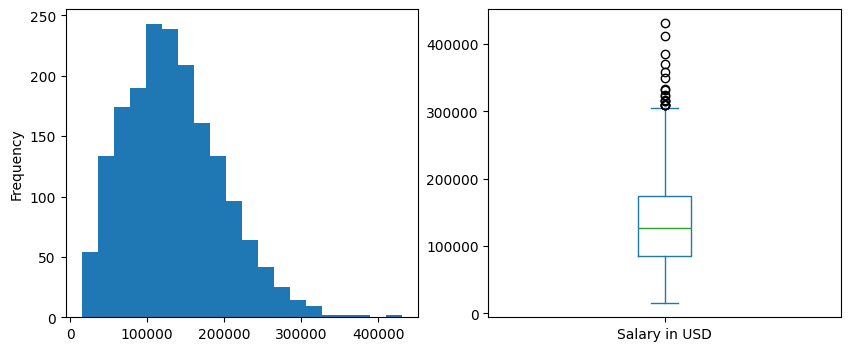

In [318]:
# Outliers & Extrim Value Analysis
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df3['Salary in USD'].plot(kind='hist',bins=20,ax=ax[0])
df3['Salary in USD'].plot(kind='box',ax=ax[1])

Upper Boundary: 308937.50
Lower Boundary: -49362.50
Percentage of outliers: 0.95%%


<Axes: >

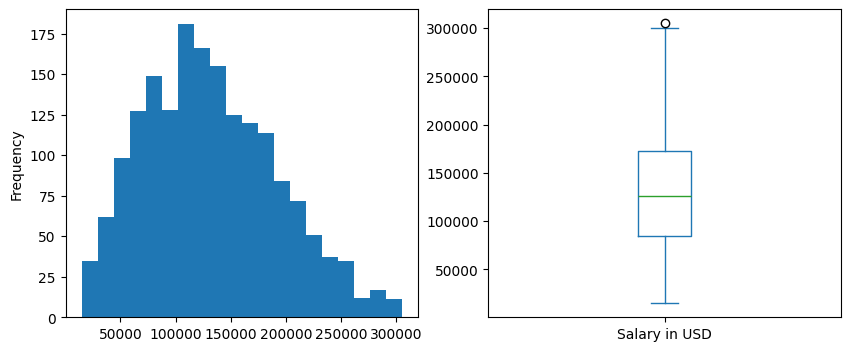

In [319]:
#skew distribution: Tukey's Rule
q1 = df3['Salary in USD'].quantile(0.25)
q3 = df3['Salary in USD'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = df3['Salary in USD'][(df3['Salary in USD']<low_bound) | (df3['Salary in USD']>up_bound)]
no_outlier = df3['Salary in USD'][(df3['Salary in USD']>=low_bound) & (df3['Salary in USD']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df3["Salary in USD"]):.2f}%%')

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [373]:
# menghitung korelasi dengan metode Kendall
# hot label
df4 = df3.copy()
df4['Job Title'] = df4['Job Title'].replace({'Data Scientist':2,'Data Engineer':1,'Data Analyst':0})
df4['Employment Type'] = df4['Employment Type'].replace({'Full-Time':3,'Part-Time':2,'Freelance':1,'Contract':0})
df4['Experience Level'] = df4['Experience Level'].replace({'Executive':3,'Senior':2,'Mid':1,'Entry':0})
df4['Expertise Level'] = df4['Expertise Level'].replace({'Director':3,'Expert':2,'Intermediate':1,'Junior':0})
df4['Company Size'] = df4['Company Size'].replace({'Small':2,'Medium':1,'Large':0})
df4

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,1,3,2,2,United States,210000,United States,1,2023
1,1,3,2,2,United States,165000,United States,1,2023
2,1,3,2,2,United States,185900,United States,1,2023
3,1,3,2,2,United States,129300,United States,1,2023
4,2,3,2,2,United States,140000,United States,1,2023
...,...,...,...,...,...,...,...,...,...
3288,1,3,1,1,United States,130800,Spain,1,2020
3291,2,3,1,1,Israel,119059,Singapore,1,2021
3293,1,3,1,1,Malta,28369,Malta,0,2021
3295,2,3,2,2,United States,412000,United States,0,2020


<Axes: >

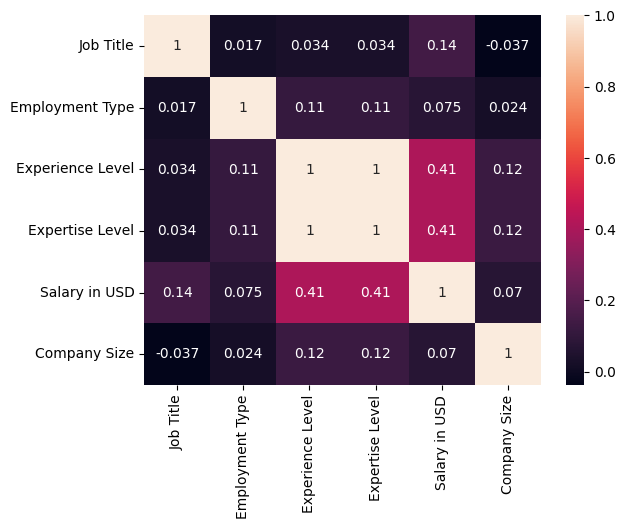

In [374]:
sns.heatmap(df4.drop(columns=['Company Location','Employee Residence','Year']).corr(method='kendall'),annot=True)

Insight: berdasarkan heatmap di atas, kecenderungan variabel-variabel pada data tidak memiliki korelasi dengan gaji. Namun jika diperingkat, terdapat 2 variabel yang hampir memiliki korelasi positif dengan gaji, yaitu variabel experience level dan expertise level sedikit mempengaruhi gaji namun tidak signifikan. 

5. Analisis dan Perhitungan
    - 5.2 Menjawab pertanyaan pada penjabaran masalah
        - 5.2.1 Berapa rata-rata gaji Data Scientist, Data Engineer, dan Data Analyst?

In [322]:
# Rata-rata gaji Data Scientist, Data Engineer, Data Analyst
mean_scientist = df3_scientist['Salary in USD'].mean()
mean_engineer = df3_engineer['Salary in USD'].mean()
mean_analyst = df3_analyst['Salary in USD'].mean()

print(f"Rata-rata gaji Data Scientist: $ {mean_scientist:.2f}")
print(f"Rata-rata gaji Data Engineer: $ {mean_engineer:.2f}")
print(f"Rata-rata gaji Data Analyst: $ {mean_analyst:.2f}")

Rata-rata gaji Data Scientist: $ 141886.16
Rata-rata gaji Data Engineer: $ 142033.87
Rata-rata gaji Data Analyst: $ 109500.38


5. Analisis dan Perhitungan
    - 5.2 Menjawab pertanyaan pada penjabaran masalah
        - 5.2.2 Bagaimana tren gaji Data Scientist, Data Engineer, dan Data Analyst dari tahun 2020 - 2023?

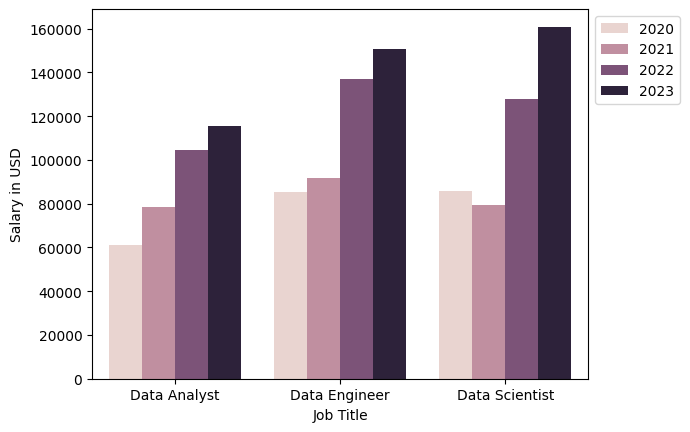

In [323]:
trend_salary = df3.groupby(['Job Title', 'Year'])['Salary in USD'].mean().reset_index()

sns.barplot(trend_salary, x='Job Title', y='Salary in USD', orient='v', hue='Year')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Insight: Ketiga job title tersebut cenderung mengalami peningkatan dari tahun ke tahun, walaupun pada tahun 2021 rata- rata gaji Data Scientist sempat mengalami penurunan, namun di tahun 2022 mengalami peningkatan kembali dengan nilai yang lebih tinggi dari tahun 2020. 

5. Analisis dan Perhitungan
    - 5.2 Menjawab pertanyaan pada penjabaran masalah
        - 5.2.3 Berapa rekomendasi gaji Data Scientist, Data Engineer, dan Data Analyst tahun 2025?

Prediksi gaji tahun 2025: $ 209204.33


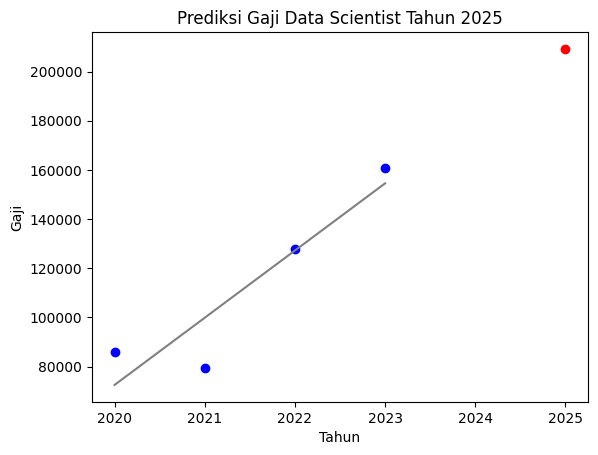

In [367]:
# Get the unique years and average salaries for each year
X_ds = pd.DataFrame({'Year': df3_scientist['Year'].unique()})
y_ds = df3_scientist.groupby('Year')['Salary in USD'].mean()

# Ensure y is aligned with X
X_ds = X_ds.sort_values('Year')  # Sort years in ascending order
y_ds = y_ds.sort_index()  # Sort the values based on the index (i.e., the 'Year' index)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_ds, y_ds)

# Memprediksi gaji tahun 2025
X_ds_new = pd.DataFrame({'Year': [2025]})
y_ds_pred = model.predict(X_ds_new)
print(f"Prediksi gaji tahun 2025: $ {y_ds_pred[0]:.2f}")

# Visualisasi
plt.scatter(X_ds, y_ds, color='blue')  # Menampilkan data asli
plt.scatter(X_ds_new, y_ds_pred, color='red')  # Menampilkan data regresi
plt.plot(X_ds_new, model.predict(X_ds_new), color='grey')  # Menampilkan garis regresi
plt.plot(X_ds, model.predict(X_ds), color='grey')  # Menampilkan garis regresi
plt.title('Prediksi Gaji Data Scientist Tahun 2025')
plt.xlabel('Tahun')
plt.ylabel('Gaji')
plt.show()

Prediksi gaji tahun 2025: $ 201098.96


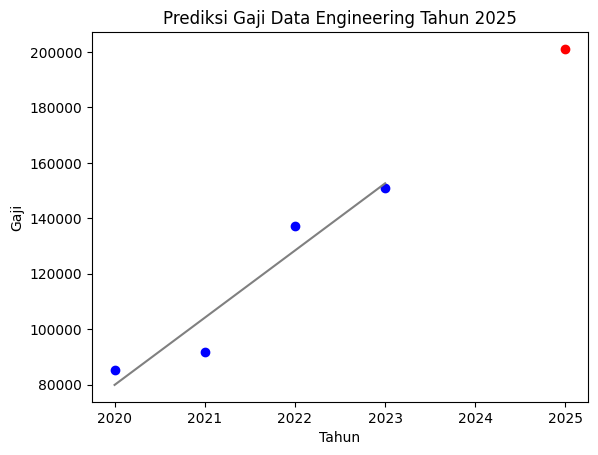

In [368]:
# Get the unique years and average salaries for each year
X_de = pd.DataFrame({'Year': df3_engineer['Year'].unique()})
y_de = df3_engineer.groupby('Year')['Salary in USD'].mean()

# Ensure y is aligned with X
X_de = X_de.sort_values('Year')  # Sort years in ascending order
y_de = y_de.sort_index()  # Sort the values based on the index (i.e., the 'Year' index)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_de, y_de)

# Memprediksi gaji tahun 2025
X_de_new = pd.DataFrame({'Year': [2025]})
y_de_pred = model.predict(X_de_new)
print(f"Prediksi gaji tahun 2025: $ {y_de_pred[0]:.2f}")

# Visualisasi
plt.scatter(X_de, y_de, color='blue')  # Menampilkan data asli
plt.scatter(X_de_new, y_de_pred, color='red')  # Menampilkan data regresi
plt.plot(X_de_new, model.predict(X_de_new), color='grey')  # Menampilkan garis regresi
plt.plot(X_de, model.predict(X_de), color='grey')  # Menampilkan garis regresi
plt.title('Prediksi Gaji Data Engineering Tahun 2025')
plt.xlabel('Tahun')
plt.ylabel('Gaji')
plt.show()

Prediksi gaji tahun 2025: $ 156177.84


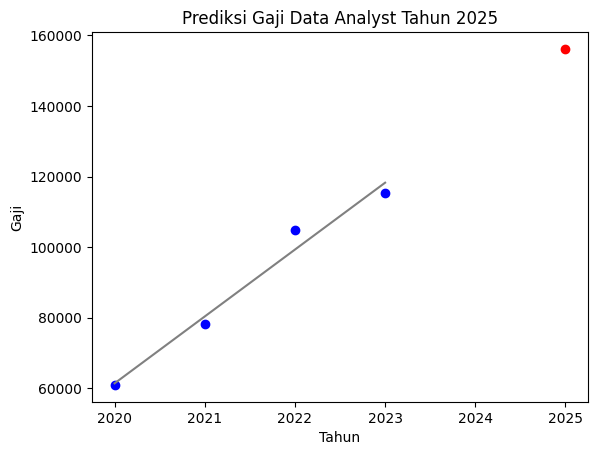

In [369]:
# Get the unique years and average salaries for each year
X_da = pd.DataFrame({'Year': df3_analyst['Year'].unique()})
y_da = df3_analyst.groupby('Year')['Salary in USD'].mean()

# Ensure y is aligned with X
X_da = X_da.sort_values('Year')  # Sort years in ascending order
y_da = y_da.sort_index()  # Sort the values based on the index (i.e., the 'Year' index)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_da, y_da)

# Memprediksi gaji tahun 2025
X_da_new = pd.DataFrame({'Year': [2025]})
y_da_pred = model.predict(X_da_new)
print(f"Prediksi gaji tahun 2025: $ {y_da_pred[0]:.2f}")

# Visualisasi
plt.scatter(X_da, y_da, color='blue')  # Menampilkan data asli
plt.scatter(X_da_new, y_da_pred, color='red')  # Menampilkan data regresi
plt.plot(X_da_new, model.predict(X_da_new), color='grey')  # Menampilkan garis regresi
plt.plot(X_da, model.predict(X_da), color='grey')  # Menampilkan garis regresi
plt.title('Prediksi Gaji Data Analyst Tahun 2025')
plt.xlabel('Tahun')
plt.ylabel('Gaji')
plt.show()

Insight: Direkomendasikan gaji 2025 sebagai berikut:
- Data Scientist = $ 209204.33
- Data Engineer = $ 201098.96
- Data Analyst = $ 156177.84

5. Analisis dan Perhitungan
    - 5.2 Menjawab pertanyaan pada penjabaran masalah
        - 5.2.4 Berapa rata-rata gaji Data Scientist, Data Engineer, dan Data Analyst tiap experience dan expertise level?
            

         Job Title Experience Level  Salary in USD
0     Data Analyst            Entry   64327.754386
1     Data Analyst        Executive  113750.000000
2     Data Analyst              Mid   99194.704000
3     Data Analyst           Senior  123588.472527
4    Data Engineer            Entry   75370.023256
5    Data Engineer        Executive  194317.000000
6    Data Engineer              Mid  105866.783133
7    Data Engineer           Senior  155895.868182
8   Data Scientist            Entry   75021.366667
9   Data Scientist        Executive  188429.578947
10  Data Scientist              Mid   96619.082278
11  Data Scientist           Senior  167714.711055


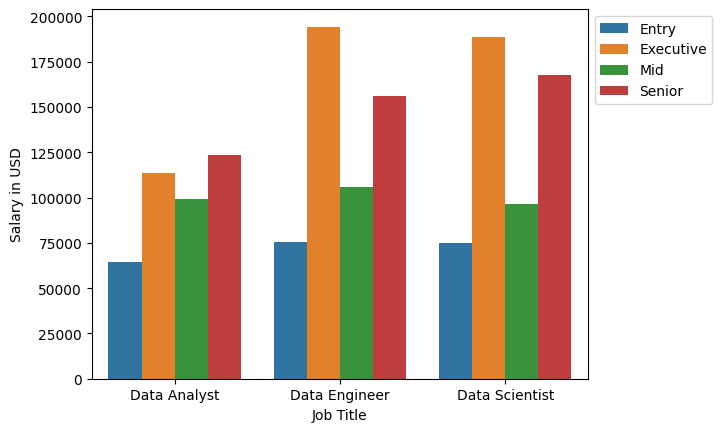

In [383]:
trend_salary2 = df3.groupby(['Job Title', 'Experience Level'])['Salary in USD'].mean().reset_index()
print(trend_salary2)

sns.barplot(trend_salary2, x='Job Title', y='Salary in USD', orient='v', hue='Experience Level')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

         Job Title Expertise Level  Salary in USD
0     Data Analyst        Director  113750.000000
1     Data Analyst          Expert  123588.472527
2     Data Analyst    Intermediate   99194.704000
3     Data Analyst          Junior   64327.754386
4    Data Engineer        Director  194317.000000
5    Data Engineer          Expert  155895.868182
6    Data Engineer    Intermediate  105866.783133
7    Data Engineer          Junior   75370.023256
8   Data Scientist        Director  188429.578947
9   Data Scientist          Expert  167714.711055
10  Data Scientist    Intermediate   96619.082278
11  Data Scientist          Junior   75021.366667


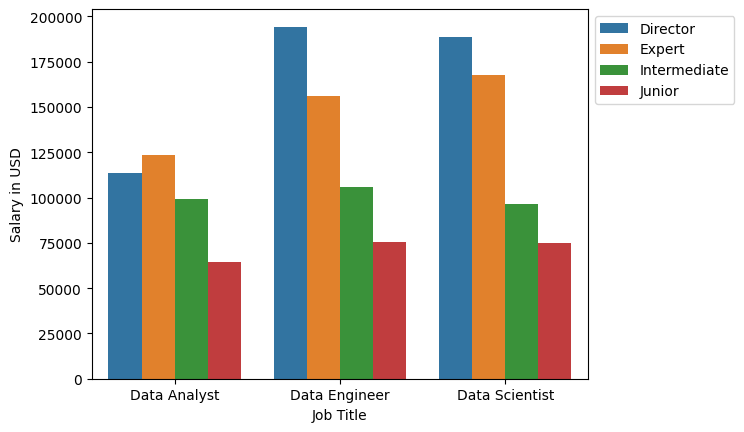

In [382]:
trend_salary3 = df3.groupby(['Job Title', 'Expertise Level'])['Salary in USD'].mean().reset_index()
print(trend_salary3)

sns.barplot(trend_salary2, x='Job Title', y='Salary in USD', orient='v', hue='Expertise Level')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

5. Analisis dan Perhitungan
    - 5.2 Menjawab pertanyaan pada penjabaran masalah
        - 5.2.5 Di negara mana gaji tertinggi Data Scientist, Data Engineer, dan Data Analyst?

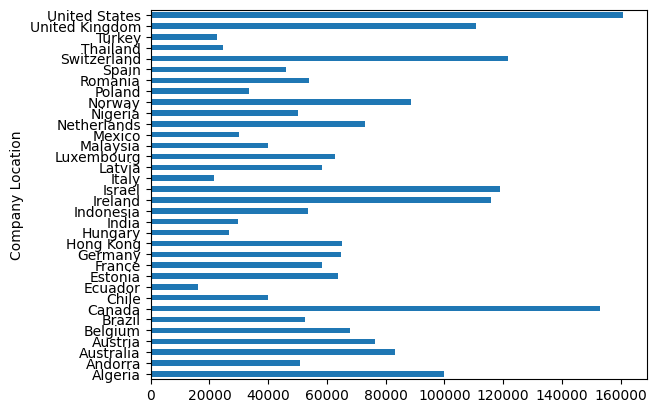

In [324]:
country_salary_sc = df3_scientist.groupby(['Company Location'])['Salary in USD'].mean().plot(kind='barh')

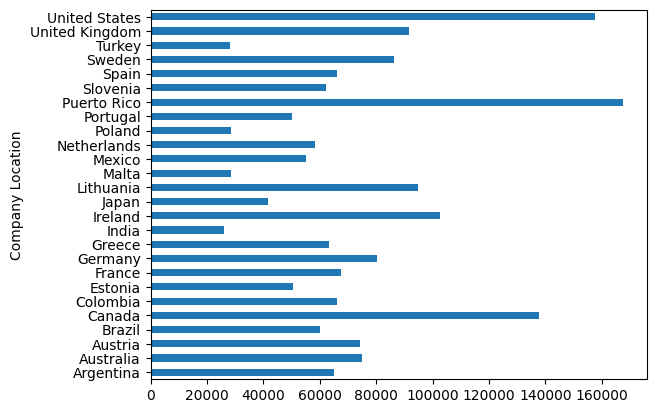

In [325]:
country_salary_en = df3_engineer.groupby(['Company Location'])['Salary in USD'].mean().plot(kind='barh')

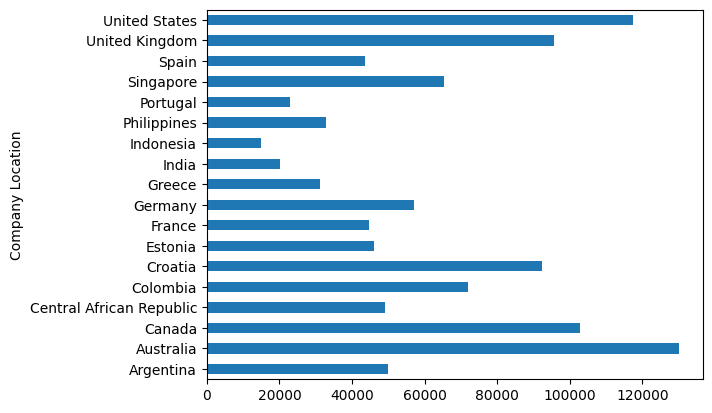

In [326]:
country_salary_an = df3_analyst.groupby(['Company Location'])['Salary in USD'].mean().plot(kind='barh')

Insight: gaji tertinggi data scientist berada di negara United State, sedangkan data engineer di negara Puerto Rico, dan data analyst di negara Australia

5. Analisis dan Perhitungan
    - 5.2 Menjawab pertanyaan pada penjabaran masalah
        - 5.2.6 Apa yang mempengaruhi tinggi - rendahnya gaji Data Scientist, Data Engineer, dan Data Analyst? (Inferential Statistics)

            Statistik inferensial adalah cabang statistika yang membahas tentang pembuatan inferensi atau penarikan kesimpulan tentang suatu populasi berdasarkan sampel data. Statistika ini melibatkan penggunaan data sampel untuk membuat generalisasi atau prediksi tentang populasi yang lebih besar tempat sampel tersebut diambil

            H0 : variable tidak mempengaruhi salary
            
            H1 : variable mempengaruhi salary

            Digunakan confidence level 95%

In [327]:
cols = df4.drop(columns=['Company Location', 'Employee Residence','Year','Salary in USD']).columns

for col in cols:
  cross = pd.crosstab(df4[col],df4['Salary in USD'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "H0 rejected" if pval<0.05 else "fail to reject H0"
  print(f"P-value of {col} and Salary: {pval} {prompt}")

P-value of Job Title and Salary: 0.59817876488025 fail to reject H0
P-value of Employment Type and Salary: 1.0 fail to reject H0
P-value of Experience Level and Salary: 0.03189342325026161 H0 rejected
P-value of Expertise Level and Salary: 0.03189342325026161 H0 rejected
P-value of Company Size and Salary: 1.6808836636158922e-10 H0 rejected


Insight: berdasarkan nilai p-value didapatkan bahwa variabel-variabel yang mempengaruhi gaji seorang Data Science (Baik scientist, engineer, maupun analyst) adalah pengalaman bekerja, tingkat keahlian kerja, serta ukuran skala level perusahaan.

6. Pengambilan Kesimpulan

Dari analisa di atas dapat disimpulkan bahwa:
- Faktor pengalaman kerja, tingkat keahlian, dan skala perusahaan mempengaruhi nilai gaji para Data Science. Dengan jenis korelasi positif, artinya apabila nilai pengalaman, tingkat keahlian, dan skala perusahaan tinggi/besar makan nilai gaji juga akan lebih besar. 
- United State dan Canada selalu masuk dalam jajaran Top 3 negara dengan tingkat gaji tertinggi untuk ketiga kategori Job Title yang dianalisa saat ini. Namun dalam hal ini, belum tentu US dan Canada merupakan negara favorit dalam mencari pekerjaan karena perlu analisa lebih dalam terkait living cost di negara tersebut.
- Rekomendasi gaji tahun 2025 untuk Data Scientist sebesar 209,204.33 USD, Data Engineer sebesar 201,098.96 USD dan Data Analyst sebesar 156,177.84 USD per tahun. Artinya posisi Data science masih cukup baik karena nilai prediksi yang meningkat dari tahun ke tahun, walaupun pada tahun 2021 sempat mengalami penurunan, besar kemungkinan adalah efek dari adanya wabah Covid.
